In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic3/train.csv
/kaggle/input/titanic3/test.csv
/kaggle/input/titanic3/gender_submission.csv


In [24]:
os.listdir('../input/titanic3')

['train.csv', 'test.csv', 'gender_submission.csv']

In [25]:
train = pd.read_csv('/kaggle/input/titanic3/train.csv')
test = pd.read_csv('/kaggle/input/titanic3/test.csv')

In [26]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (891, 12)
Testing data shape:  (418, 11)


In [27]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# **Detecting Missing Values**

In [29]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)    
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [30]:
train_missing = missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [31]:
test_missing = missing_values_table(test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


# **Missingno Library**

<Axes: >

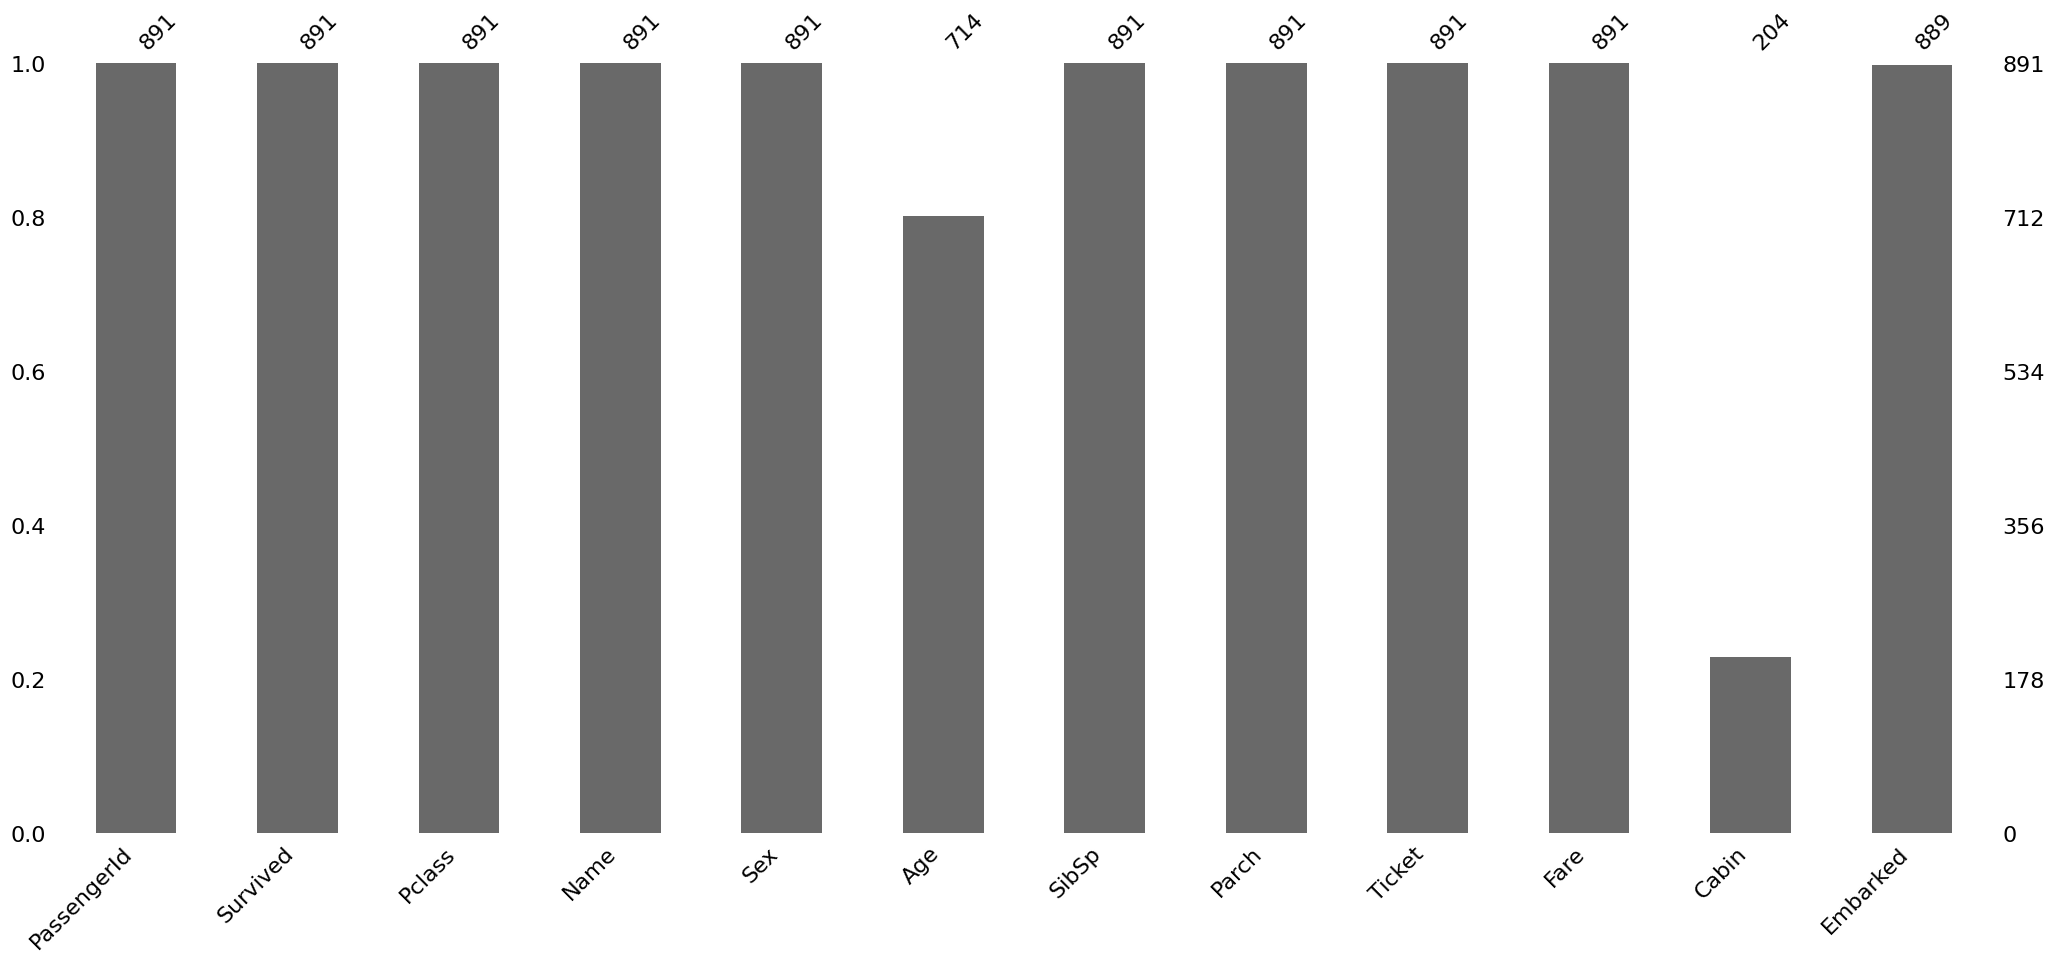

In [32]:
msno.bar(train)

# **Reasons for Missing Values**

# **Matrix Plot**

<Axes: >

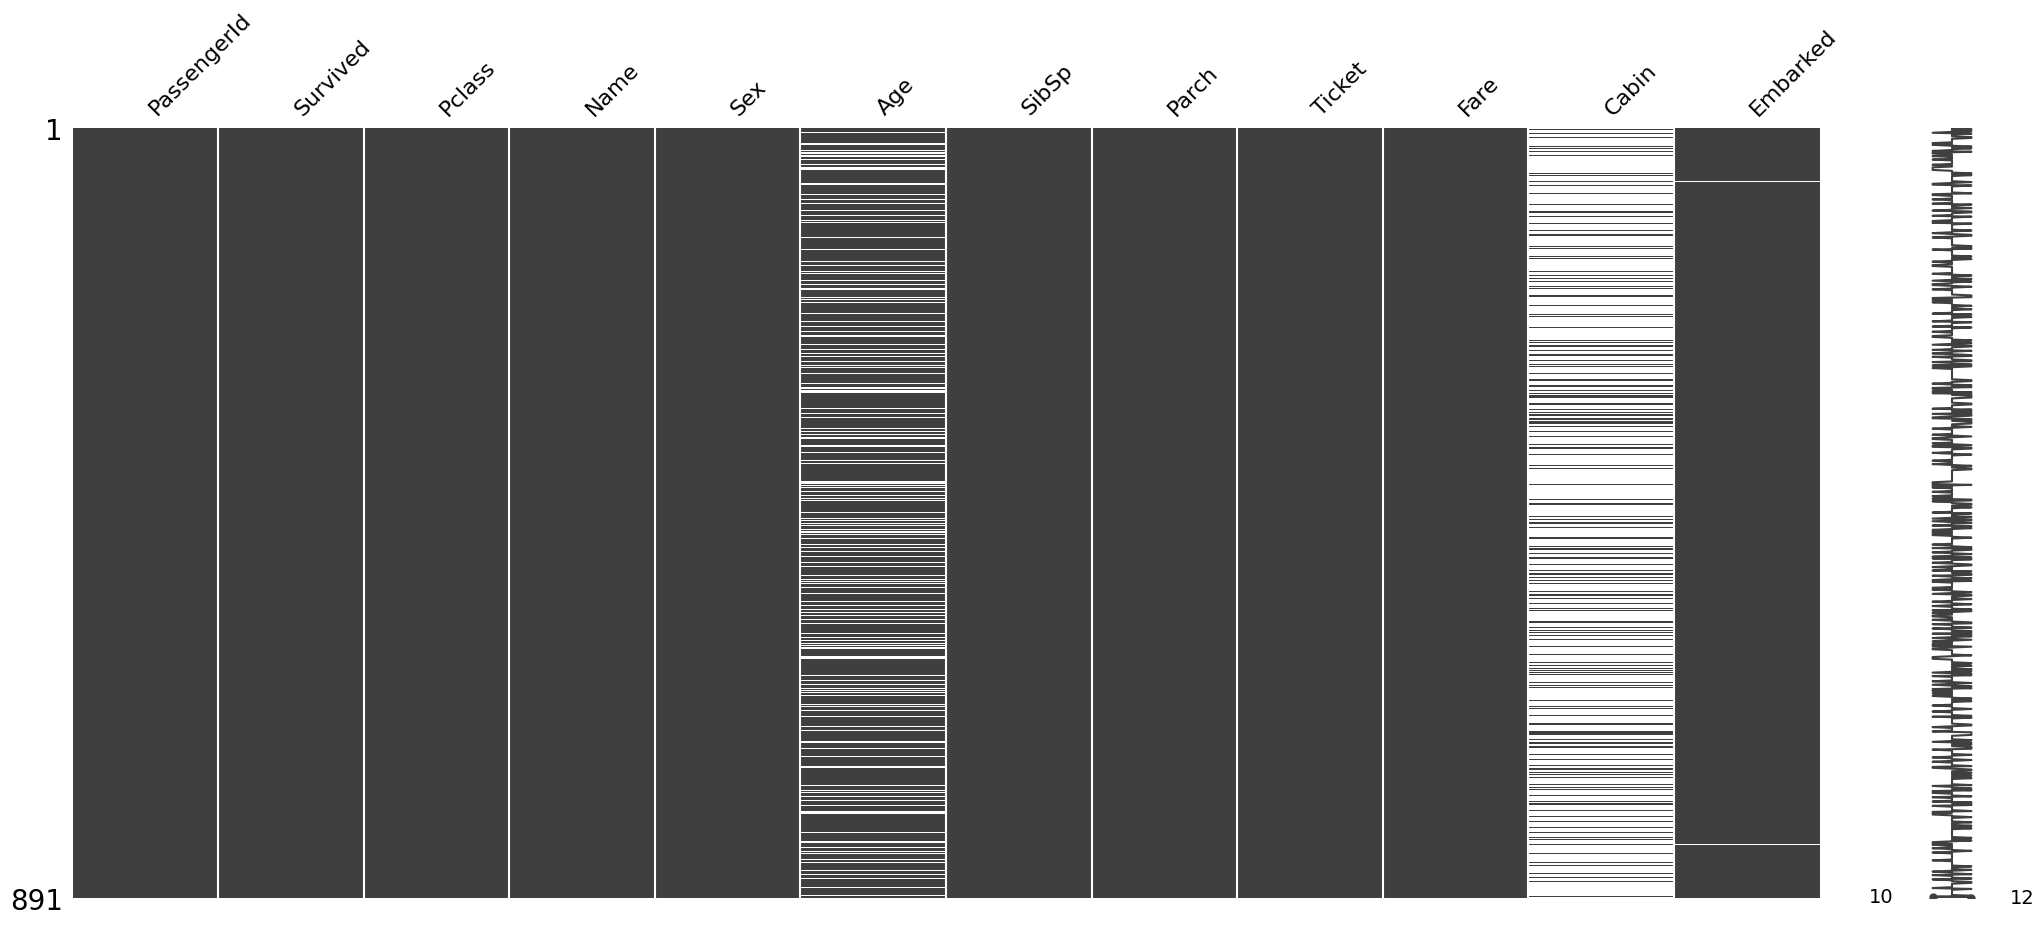

In [33]:
msno.matrix(train)

<Axes: >

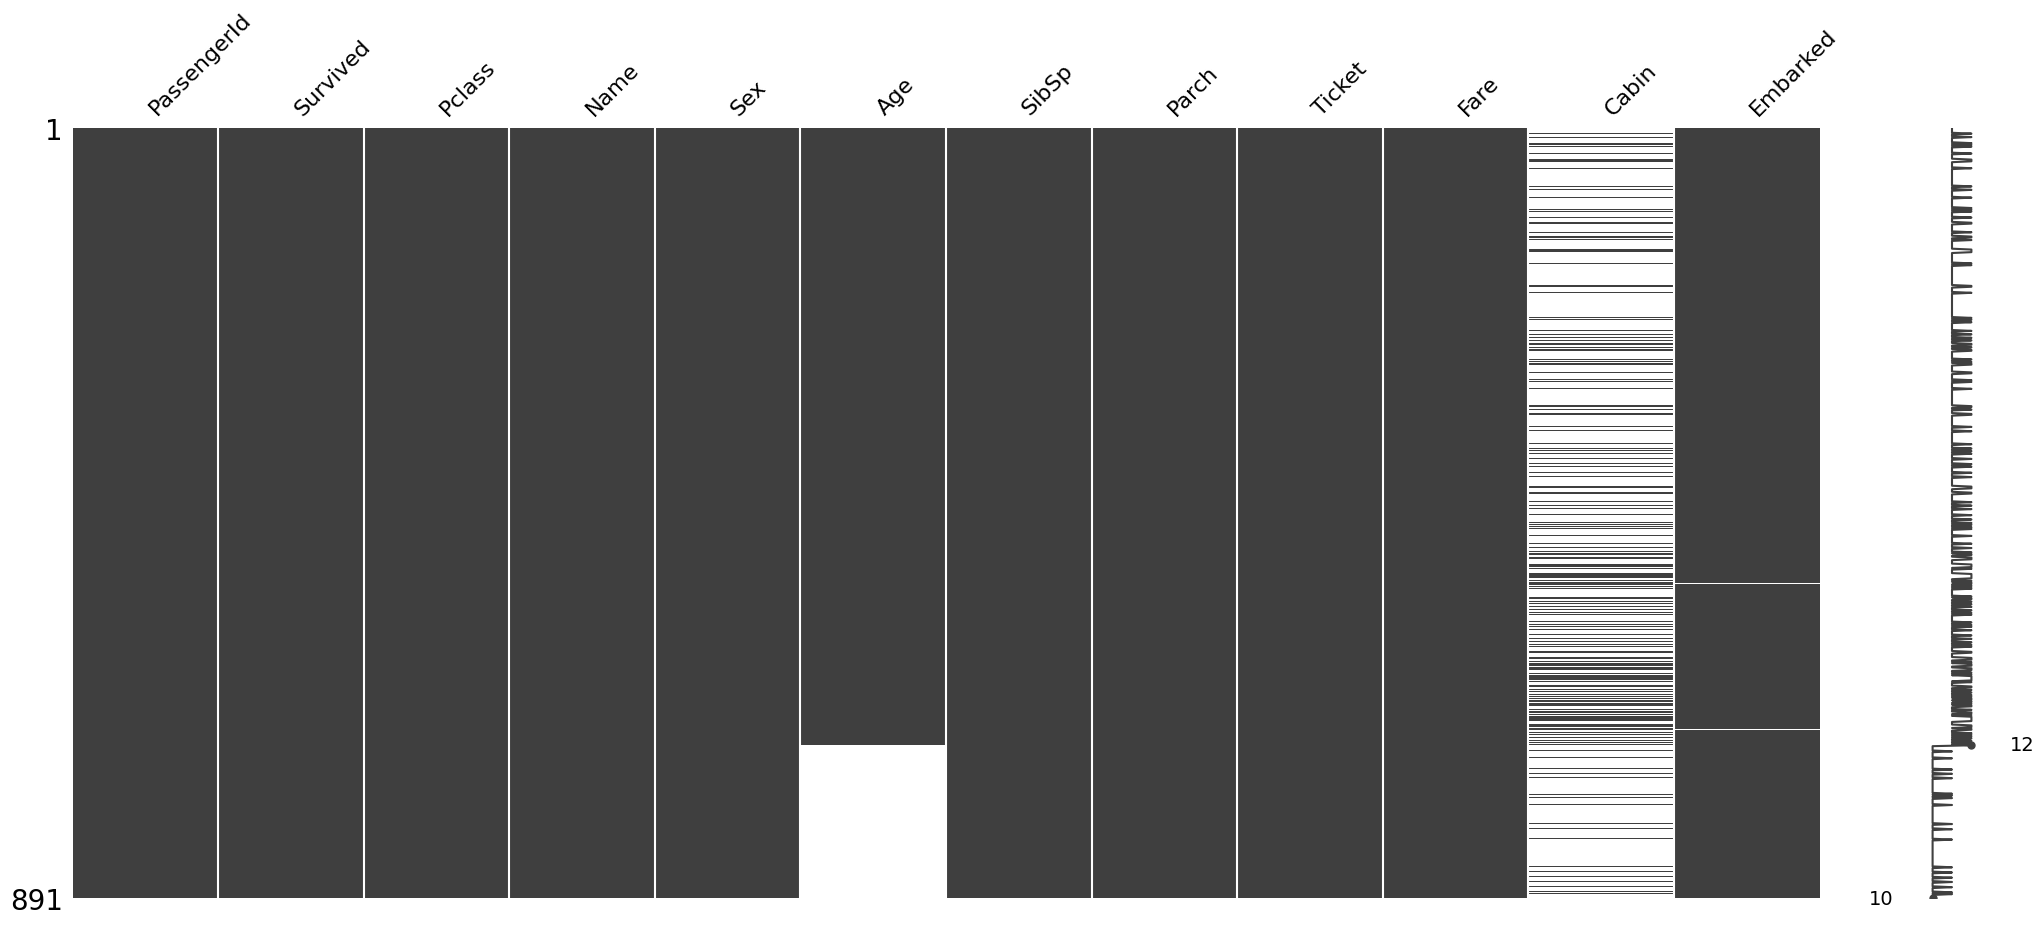

In [34]:
sorted = train.sort_values('Age')
msno.matrix(sorted)

# **Heatmap**

<Axes: >

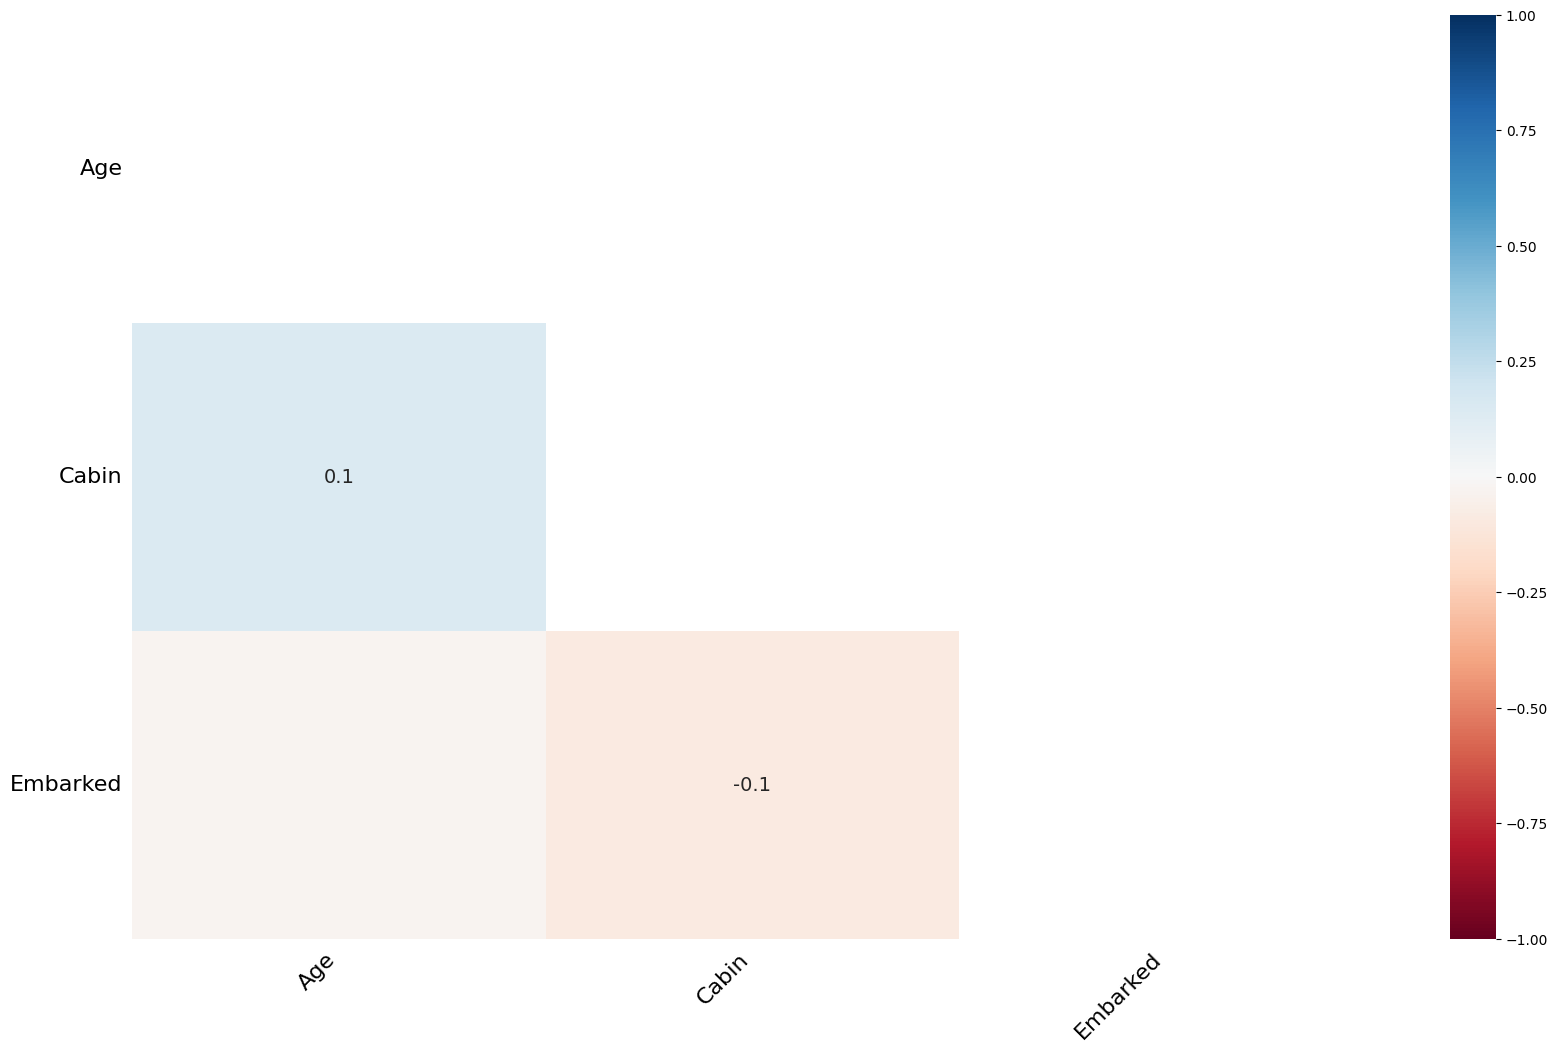

In [35]:
msno.heatmap(train)

# **Dendrogram**

<Axes: >

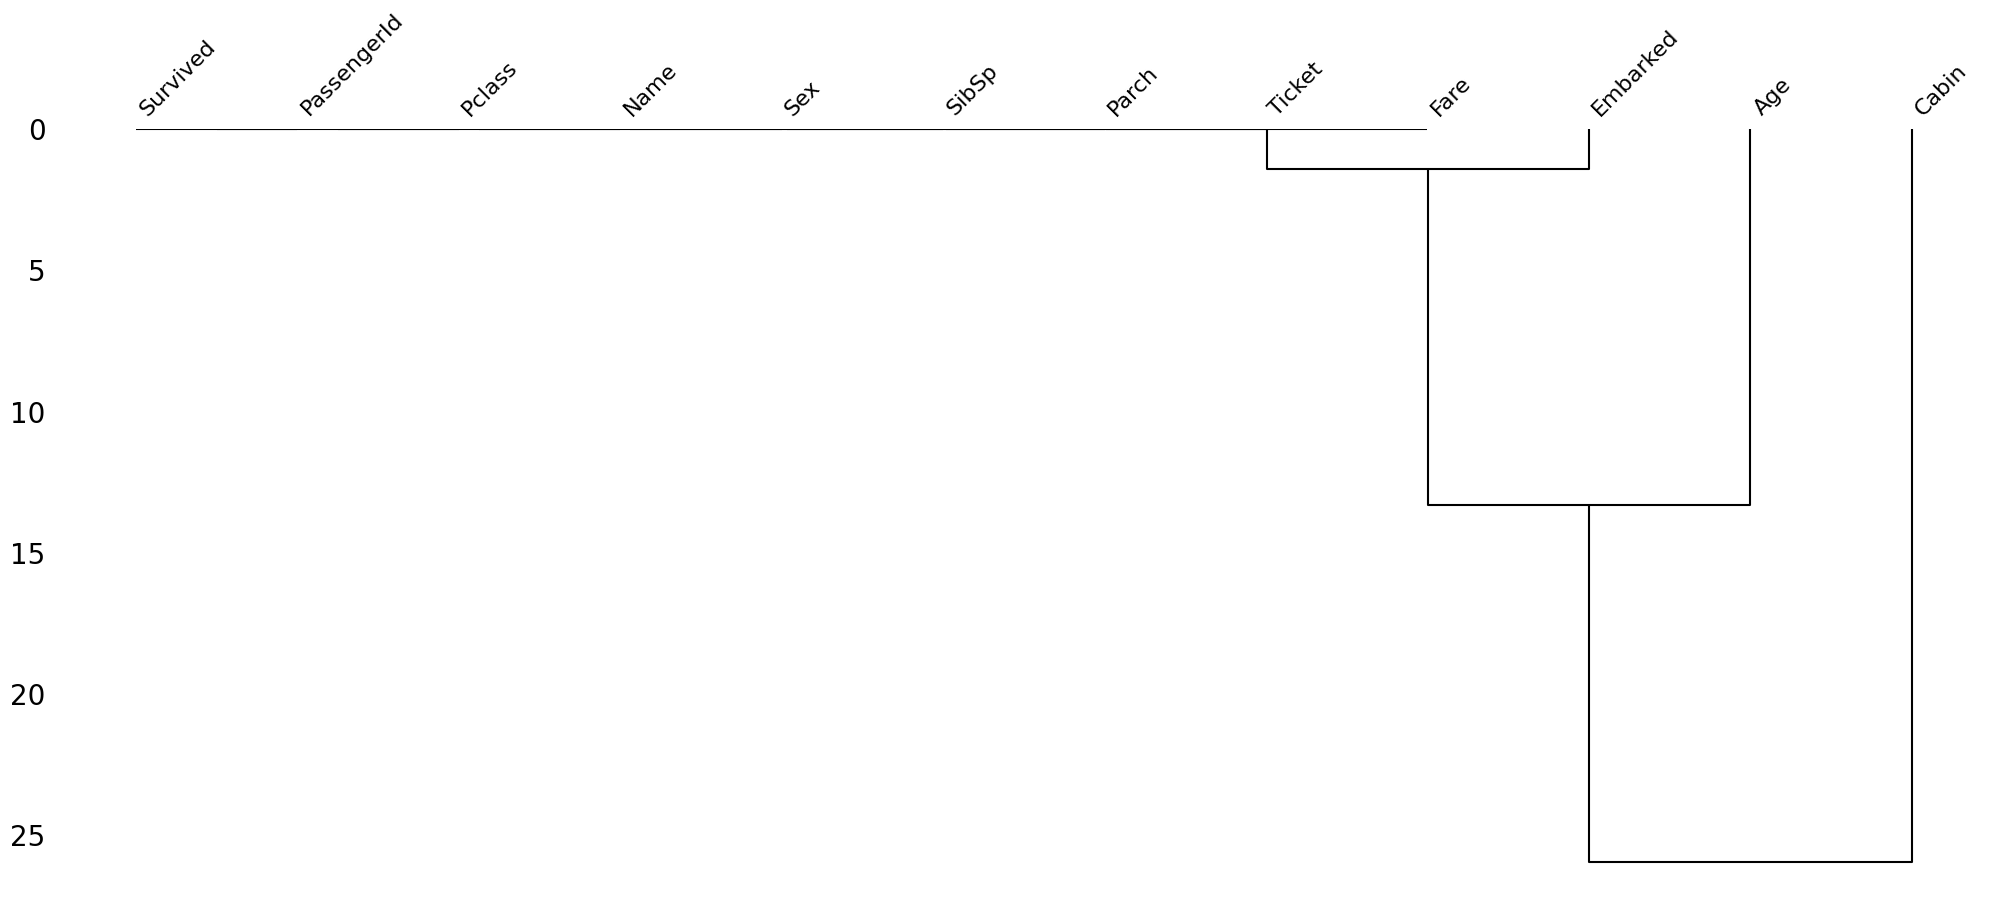

In [36]:
msno.dendrogram(train)

# **Treating Missing Values**

# **Pairwise Deletion**

In [74]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
train_1 = train.copy()
train_1['Age'].mean()

29.69911764705882

# **Listwise Deletion/ Dropping rows**

In [38]:
train_1.dropna(subset=['Age'], how='any', inplace=True)
train_1['Age'].isnull().sum()

0

# **Basic Imputation Technique**

In [39]:
from sklearn.impute import SimpleImputer

In [52]:
train_most_frequent = train.copy()

mean_imputer = SimpleImputer(strategy='most_frequent')

train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)

In [53]:
train_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# **Time Series Problems**

In [55]:
os.listdir('../input/air-quality-data-in-india')

['station_hour.csv', 'city_day.csv', 'city_hour.csv', 'station_day.csv']

In [57]:
city_day = pd.read_csv('../input/air-quality-data-in-india/city_day.csv',parse_dates=True,index_col='Date')
city_day1 = city_day.copy(deep=True)
city_day.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [58]:
city_day_missing = missing_values_table(city_day)
city_day_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,16989,60.3
PM10,11005,39.1
NH3,10121,35.9
Toluene,7715,27.4
Benzene,5386,19.1
AQI,4575,16.2
AQI_Bucket,4575,16.2
PM2.5,4552,16.2
NOx,4142,14.7
O3,3888,13.8


In [73]:
city_day['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

# **Imputing using ffill**

In [60]:
city_day.fillna(method='ffill', inplace=True)
city_day['Xylene'][50:65]

/tmp/ipykernel_33/150434736.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day.fillna(method='ffill', inplace=True)


Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
Name: Xylene, dtype: float64

# **Imputation using bfill**

In [61]:
city_day['AQI'][20:30]

Date
2015-01-21      NaN
2015-01-22      NaN
2015-01-23      NaN
2015-01-24      NaN
2015-01-25      NaN
2015-01-26      NaN
2015-01-27      NaN
2015-01-28      NaN
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

In [62]:
city_day.fillna(method='bfill', inplace=True)
city_day['AQI'][20:30]

/tmp/ipykernel_33/1720684174.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day.fillna(method='bfill', inplace=True)


Date
2015-01-21    209.0
2015-01-22    209.0
2015-01-23    209.0
2015-01-24    209.0
2015-01-25    209.0
2015-01-26    209.0
2015-01-27    209.0
2015-01-28    209.0
2015-01-29    209.0
2015-01-30    328.0
Name: AQI, dtype: float64

# **Linear Interpolation method**

In [63]:
city_day1['Xylene'][50:65]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
Name: Xylene, dtype: float64

In [64]:
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:65]

/tmp/ipykernel_33/3518606325.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  city_day1.interpolate(limit_direction="both",inplace=True)


Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
Name: Xylene, dtype: float64

# **K-Nearest Neighbor Imputation**

In [65]:
train_knn = train.copy(deep=True)

In [66]:
from sklearn.impute import KNNImputer

In [67]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['Age'] = knn_imputer.fit_transform(train_knn[['Age']])

In [69]:
train_knn['Age'].isnull().sum()

0

# **Multivariate feature imputation**

In [70]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [71]:
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['Age'] = mice_imputer.fit_transform(train_mice[['Age']])

In [72]:
train_mice['Age'].isnull().sum()

0